In [52]:
import os


from data_ingestor import *
from basic_data_inspection import DataInspector, DataTypeInspection, SummaryDataInspection
from univariate_analysis import UnivariateContext, NumericalUnivariateAnalysis, CategoricalUnivariateAnalysis
from missing_value_handling import *

In [5]:
path = r"D:\myscripts\data\Housing.zip"
file_ext = os.path.splitext(path)[1]
ingestor_type = DataIngestorFactory.get_data_ingestor(file_ext)
df = ingestor_type.ingest(path)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [6]:
data_inspector = DataInspector(DataTypeInspection())
data_inspector.execute_strategy(df)

Data types and Non-null columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None


In [7]:
data_inspector.set_strategy(SummaryDataInspection())
data_inspector.execute_strategy(df)

Summary for numerical varaibles
              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000  
Summary for categorical varaibles
       mainroad guestroom basement hotwaterheating airconditioning prefarea  \
count       545  

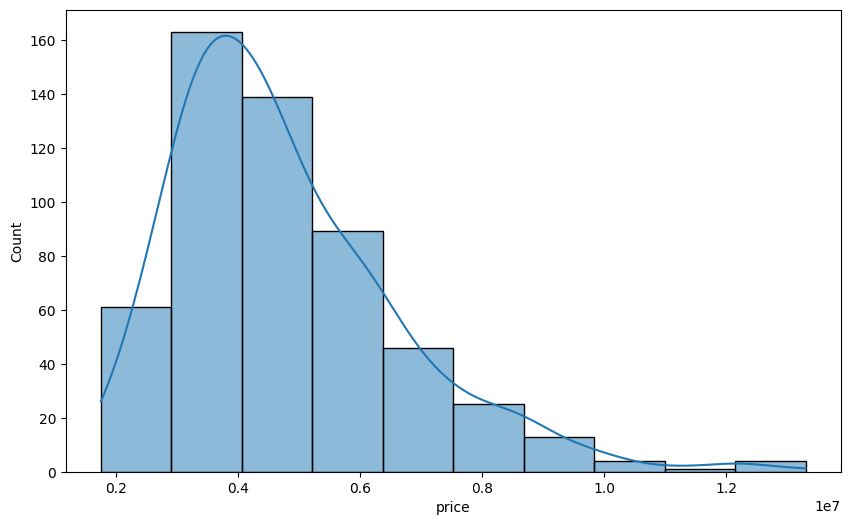

In [28]:
univariate = UnivariateContext(NumericalUnivariateAnalysis)
univariate.analyzestrategy(df, "price")

<Figure size 1000x600 with 0 Axes>

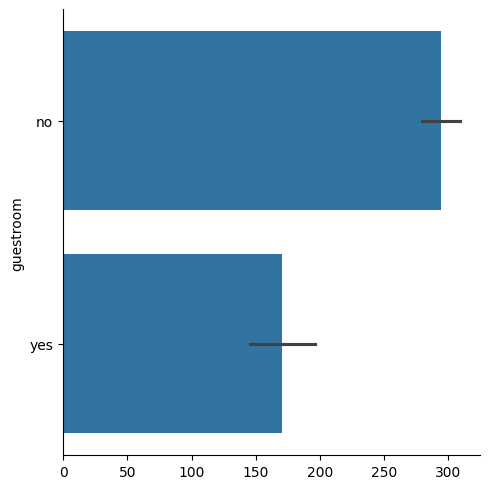

In [32]:
univariate_cat = UnivariateContext(CategoricalUnivariateAnalysis)
univariate_cat.analyzestrategy(df, "guestroom")


In [54]:

missing_value_handling = MissingValueContext(DropMissingValueStrategy)
newdf = missing_value_handling.execute(df)
newdf

missing_value_handling.set_strategy(FillMissingValueStrategy)
missing_value_handling.execute(df)


2024-10-17 00:18:23,928 - INFO - Execute missing called
2024-10-17 00:18:23,929 - INFO - Drop missing called
2024-10-17 00:18:23,932 - INFO - Execute missing called
2024-10-17 00:18:23,933 - INFO - Fill missing called


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
